In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training4.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.150095,0.342066,0.245505,0.823709,0.456088,0.456088,0.456088,0.0,0.456088,0.0,...,0.0,0.0,0.0,0.0,0.073461,0.444283,0.456088,0.440378,0.027335,208500
1,0.043704,0.309687,0.275454,0.858742,0.412917,0.412917,0.412917,0.0,0.206458,0.0,...,0.0,0.0,0.0,0.0,0.173726,0.400042,0.412917,0.398694,0.153434,181500
2,0.118371,0.270847,0.200518,0.890162,0.361130,0.000000,0.361130,0.0,0.361130,0.0,...,0.0,0.0,0.0,0.0,0.276877,0.347432,0.361130,0.348691,0.030301,223500
3,0.159663,0.311608,0.203805,0.859956,0.415478,0.000000,0.415478,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.066395,0.402442,0.415478,0.000000,0.453197,140000
4,0.094961,0.218296,0.199566,0.918118,0.291061,0.000000,0.291061,0.0,0.145531,0.0,...,0.0,0.0,0.0,0.0,0.297982,0.275967,0.291061,0.281036,0.027911,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.187647,-0.404171,-0.150610,0.228495,-0.403474,-0.354273,-0.311037,-0.014314,-0.249109,-0.015982,...,0.041436,0.074595,0.079494,-0.039699,-0.220379,-0.415640,-0.375715,-0.190818,-0.581832,1.000000
Fireplaces,0.063249,0.007837,0.047980,-0.071319,0.006838,-0.066368,-0.018833,0.005340,0.010777,0.010396,...,0.005958,0.152924,0.031778,-0.011221,0.034248,0.000863,0.011667,0.074801,-0.139056,0.296401
MasVnrArea,0.226649,0.045938,0.020590,-0.232372,0.126856,0.070116,0.146934,0.039206,0.104347,-0.038813,...,0.008330,0.047443,-0.020110,-0.039165,0.070193,0.125313,0.093777,0.114912,-0.225699,0.286091
GarageArea,0.338253,0.162839,0.212572,-0.397094,0.355021,0.202603,0.348230,-0.012106,0.255043,-0.071831,...,0.002265,0.024850,-0.028577,-0.072354,0.234028,0.357993,0.259190,0.360551,-0.310870,0.250840
LotArea,-0.863094,-0.755708,-0.218895,1.000000,-0.917599,-0.639649,-0.765542,0.020686,-0.643130,0.009557,...,0.035842,0.031591,0.036059,-0.029195,-0.555556,-0.924604,-0.772368,-0.671901,-0.224720,0.228495
GarageCars,0.423849,0.232367,0.220673,-0.477601,0.425237,0.245790,0.398520,-0.011345,0.296085,-0.071124,...,0.003594,0.017486,-0.032757,-0.082006,0.277124,0.428144,0.324890,0.413761,-0.315702,0.219479
BsmtFinSF1,0.157114,0.096525,0.083294,-0.176603,0.153751,0.039327,0.138310,-0.021591,0.127488,0.063618,...,0.028868,0.072497,0.018856,-0.026515,0.129270,0.151753,0.132957,0.117896,-0.181597,0.209936
TotalBsmtSF,0.306169,0.325522,0.274670,-0.503970,0.455491,0.240865,0.399690,-0.029198,0.330091,-0.018536,...,0.010556,0.062309,-0.020677,-0.087436,0.313648,0.454333,0.346140,0.378087,-0.152333,0.208208
GrLivArea,0.602790,0.411877,0.242027,-0.653633,0.576926,0.373730,0.463320,-0.027909,0.391960,-0.025684,...,-0.018361,0.023221,-0.010039,-0.060111,0.392246,0.574364,0.469275,0.446161,0.065657,0.184438
OpenPorchSF,0.113680,-0.058095,0.053859,-0.105168,0.086041,0.032515,0.098391,0.014226,0.032429,-0.054175,...,-0.021118,0.019464,-0.009159,-0.024226,0.084887,0.083532,0.070389,0.097935,-0.142074,0.184272


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=DecisionTreeRegressor(criterion='absolute_error',splitter='random',max_features='log2')

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'Fireplaces', 'MasVnrArea', 'GarageArea', 'LotArea',
       'GarageCars', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'OpenPorchSF'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,40780.602740,66099.079240,0.430391
1,11,48710.962329,81918.490880,0.125117
2,12,49298.945205,82913.748660,0.103729
3,13,44275.845890,76566.407215,0.235702
4,14,44742.126712,73439.325743,0.296857
...,...,...,...,...
105,115,38445.434932,56401.820144,0.585263
106,116,36200.496575,59969.921175,0.531129
107,117,38363.606164,57179.663865,0.573745
108,118,36360.191781,58651.819069,0.551514


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
77,87,34123.195205,57013.931098,0.576213
39,49,34271.619863,52356.267761,0.642626
98,108,34449.167808,50903.324396,0.662185
58,68,34801.253425,59594.142381,0.536987
27,37,34994.530822,54410.641244,0.614030
...,...,...,...,...
13,23,48420.969178,79786.851668,0.170056
1,11,48710.962329,81918.490880,0.125117
54,64,48784.715753,85880.952753,0.038432
2,12,49298.945205,82913.748660,0.103729


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


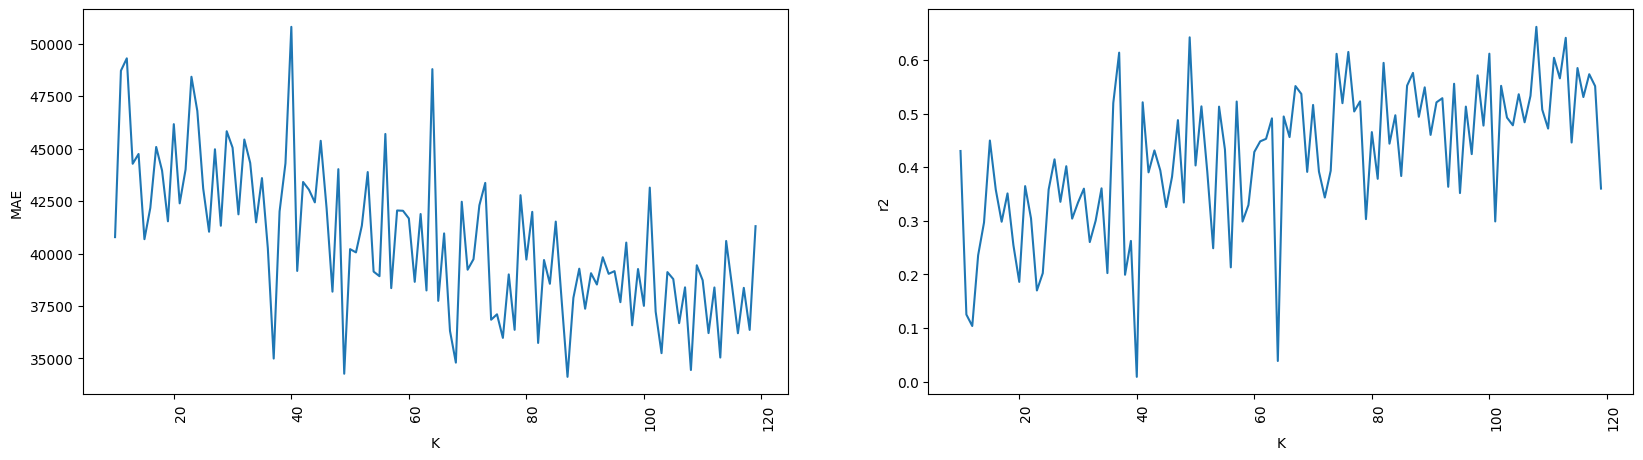

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       3.261390e-02
MSZoning         2.602904e-02
LotFrontage      5.107889e-03
LotArea          2.617374e-02
Street           2.493119e-02
                     ...     
YrSold           2.532877e-02
SaleType         3.044613e-02
SaleCondition    3.442249e-02
Ageofhouse       3.430254e-02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,34817.845890,51515.276157,0.654014
1,101,41020.955479,63825.107885,0.468909
2,102,36834.565068,61330.872021,0.509607
3,103,36720.407534,56901.724862,0.577879
4,104,38883.578767,60026.125415,0.530250
...,...,...,...,...
395,495,36936.273973,55614.585939,0.596760
396,496,36617.342466,56033.219119,0.590666
397,497,36134.863014,54624.740607,0.610986
398,498,38882.010274,65307.348705,0.443955


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
387,487,31079.866438,49127.531053,0.685344
251,351,31847.181507,47278.727372,0.708581
88,188,32771.619863,49317.537871,0.682905
152,252,33057.760274,47947.029695,0.700284
302,402,33074.386986,49231.735171,0.684008
...,...,...,...,...
351,451,43076.246575,66484.861116,0.423722
344,444,43220.445205,70381.053301,0.354201
169,269,43357.962329,73285.276951,0.299804
360,460,43503.434932,70646.303743,0.349324


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


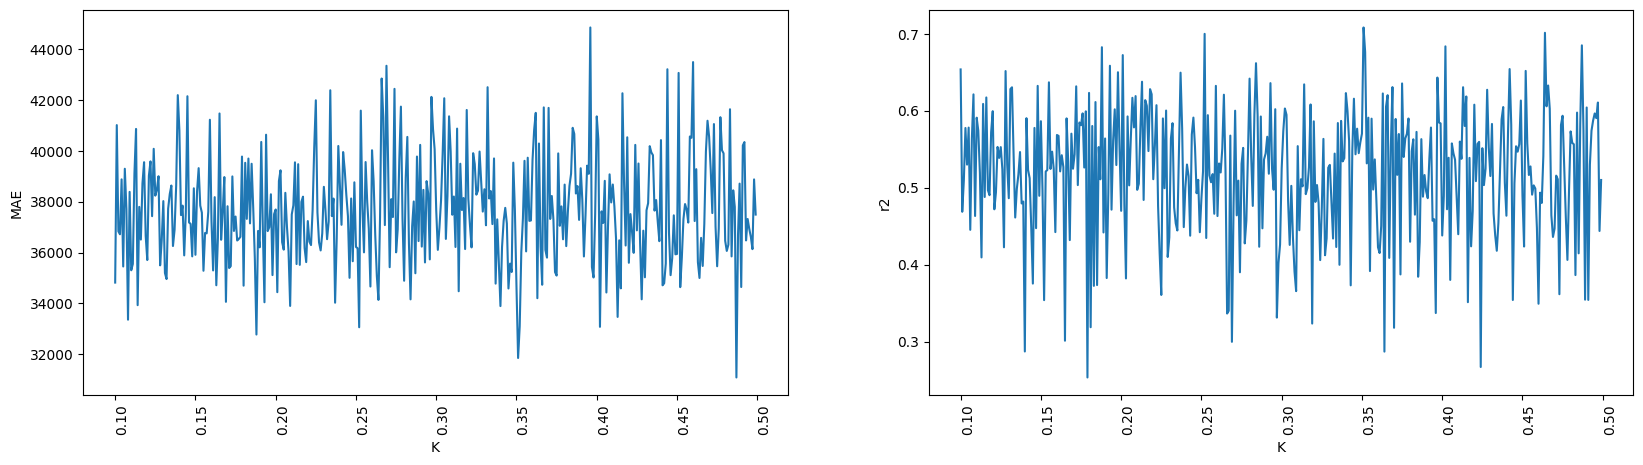

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


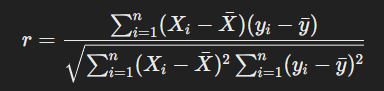

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.030435711798881705


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'Fireplaces', 'GarageCars',
       'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,46310.517123,76235.958964,0.242285
1,6,44039.085616,68572.663959,0.386961
2,7,47607.876712,77123.445633,0.224541
3,8,43920.130137,65177.702793,0.446160
4,9,45123.801370,73268.207101,0.300130
...,...,...,...,...
110,115,33101.945205,50177.158240,0.671755
111,116,38288.027397,62730.749910,0.486965
112,117,34222.630137,48995.999294,0.687027
113,118,34512.496575,56925.693459,0.577523


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
82,87,32416.643836,51728.546388,0.651144
110,115,33101.945205,50177.158240,0.671755
90,95,33522.246575,53306.815074,0.629531
76,81,33670.993151,49572.074353,0.679624
86,91,33964.791096,52076.943089,0.646429
...,...,...,...,...
15,20,47992.869863,79334.065230,0.179449
30,35,48445.943493,81599.906240,0.131909
6,11,48591.938356,78539.271282,0.195808
12,17,48980.116438,79795.731538,0.169871


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


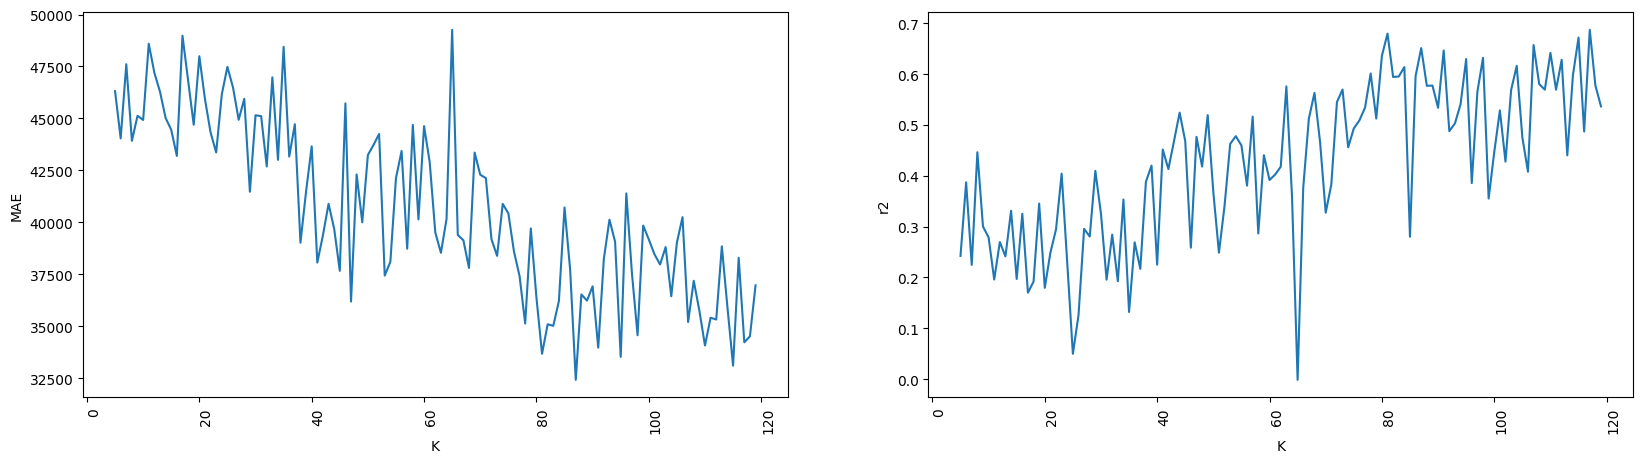

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

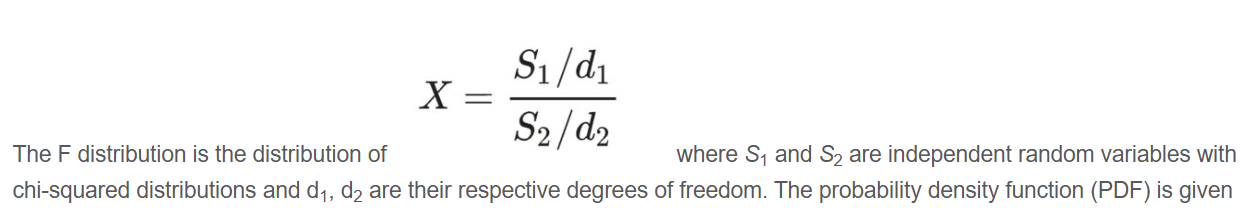

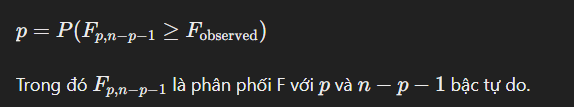

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,45592.078767,71544.628697,0.332671
1,6,41351.845890,62494.899375,0.490815
2,7,40932.880137,61423.762716,0.508120
3,8,43521.784247,62149.192262,0.496433
4,9,42136.044521,59938.730918,0.531617
...,...,...,...,...
110,115,37746.171233,63056.002603,0.481631
111,116,41122.089041,69155.825174,0.376490
112,117,36880.523973,56415.558672,0.585061
113,118,36045.893836,56629.893179,0.581902


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
73,78,32874.811644,52023.723008,0.647151
81,86,33065.743151,52864.916070,0.635648
102,107,33522.667808,49686.473034,0.678143
55,60,34071.095890,48811.711401,0.689377
109,114,34444.500000,55397.384870,0.599904
...,...,...,...,...
10,15,43951.897260,66186.449213,0.428884
21,26,43987.852740,69775.098039,0.365273
5,10,45266.243151,71655.652909,0.330598
0,5,45592.078767,71544.628697,0.332671


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


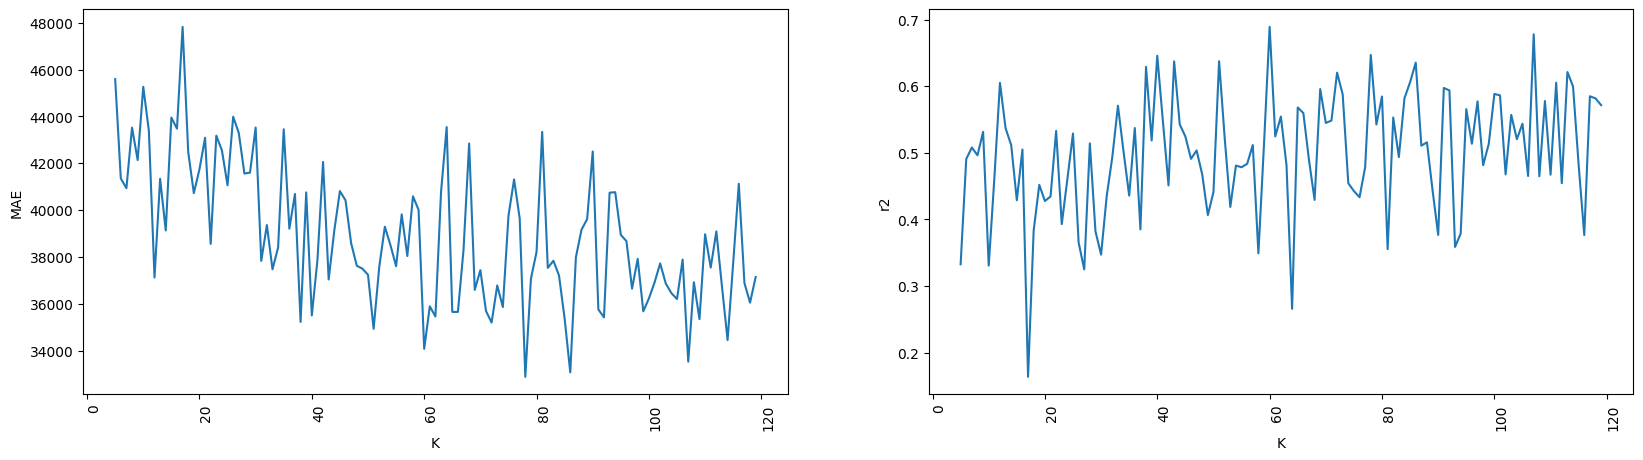

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

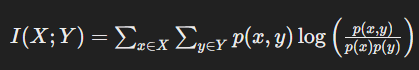

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

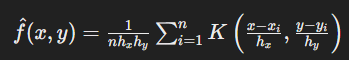

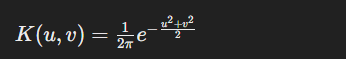

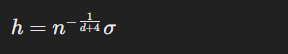

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,44100.804795,69859.775305,0.363731
1,6,37911.383562,58979.349128,0.546491
2,7,41963.078767,66907.818573,0.416367
3,8,41115.342466,61069.275025,0.513781
4,9,37208.791096,57250.259226,0.572692
...,...,...,...,...
110,115,34319.633562,50785.122009,0.663752
111,116,39025.078767,60292.936761,0.526065
112,117,35541.938356,52277.045781,0.643706
113,118,37775.140411,53294.443863,0.629703


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
44,49,30944.469178,48463.777380,0.693789
71,76,33313.873288,51610.809095,0.652730
78,83,34180.434932,54206.336987,0.616923
42,47,34267.589041,57010.972316,0.576256
110,115,34319.633562,50785.122009,0.663752
...,...,...,...,...
30,35,42183.458904,64535.925163,0.457013
6,11,43096.493151,70140.942915,0.358599
19,24,43135.013699,64764.816133,0.453155
20,25,43437.345890,74810.546249,0.270355


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_26508\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


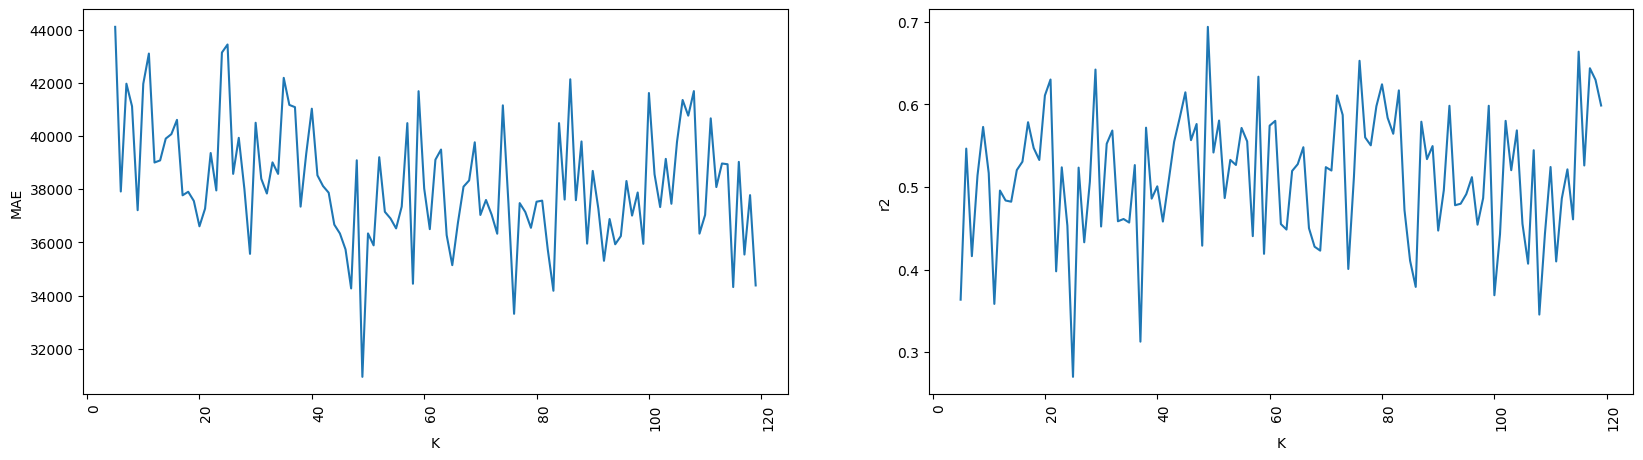

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987
1,6,30848.821918,48806.875191,0.689438
2,7,31759.996575,48543.677210,0.692779
3,8,35324.150685,58702.112897,0.550744
4,9,32119.191781,56446.864518,0.584601
...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705
111,116,33541.866438,57154.550185,0.574119
112,117,37123.773973,69512.773410,0.370036
113,118,33971.434932,51615.333079,0.652669


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,32216.571918,51029.290761,0.660511
1,6,31696.952055,51785.612944,0.650373
2,7,30930.285959,45474.885169,0.730394
3,8,28150.852740,41612.531800,0.774247
4,9,26277.441781,39881.420468,0.792639
...,...,...,...,...
110,115,33571.458904,57774.979377,0.564823
111,116,32946.318493,53217.789456,0.630768
112,117,32988.753425,50576.188337,0.666513
113,118,34779.452055,56433.891155,0.584792


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,44100.804795,69859.775305,0.363731
1,6,37911.383562,58979.349128,0.546491
2,7,41963.078767,66907.818573,0.416367
3,8,41115.342466,61069.275025,0.513781
4,9,37208.791096,57250.259226,0.572692
...,...,...,...,...
110,115,34319.633562,50785.122009,0.663752
111,116,39025.078767,60292.936761,0.526065
112,117,35541.938356,52277.045781,0.643706
113,118,37775.140411,53294.443863,0.629703


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,33486.851027,52840.300258,0.635987,32216.571918,51029.290761,0.660511
1,6,30848.821918,48806.875191,0.689438,31696.952055,51785.612944,0.650373
2,7,31759.996575,48543.677210,0.692779,30930.285959,45474.885169,0.730394
3,8,35324.150685,58702.112897,0.550744,28150.852740,41612.531800,0.774247
4,9,32119.191781,56446.864518,0.584601,26277.441781,39881.420468,0.792639
...,...,...,...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705,33571.458904,57774.979377,0.564823
111,116,33541.866438,57154.550185,0.574119,32946.318493,53217.789456,0.630768
112,117,37123.773973,69512.773410,0.370036,32988.753425,50576.188337,0.666513
113,118,33971.434932,51615.333079,0.652669,34779.452055,56433.891155,0.584792


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,33486.851027,52840.300258,0.635987,32216.571918,51029.290761,0.660511,44100.804795,69859.775305,0.363731
1,6,30848.821918,48806.875191,0.689438,31696.952055,51785.612944,0.650373,37911.383562,58979.349128,0.546491
2,7,31759.996575,48543.677210,0.692779,30930.285959,45474.885169,0.730394,41963.078767,66907.818573,0.416367
3,8,35324.150685,58702.112897,0.550744,28150.852740,41612.531800,0.774247,41115.342466,61069.275025,0.513781
4,9,32119.191781,56446.864518,0.584601,26277.441781,39881.420468,0.792639,37208.791096,57250.259226,0.572692
...,...,...,...,...,...,...,...,...,...,...
110,115,33633.143836,56099.014733,0.589705,33571.458904,57774.979377,0.564823,34319.633562,50785.122009,0.663752
111,116,33541.866438,57154.550185,0.574119,32946.318493,53217.789456,0.630768,39025.078767,60292.936761,0.526065
112,117,37123.773973,69512.773410,0.370036,32988.753425,50576.188337,0.666513,35541.938356,52277.045781,0.643706
113,118,33971.434932,51615.333079,0.652669,34779.452055,56433.891155,0.584792,37775.140411,53294.443863,0.629703


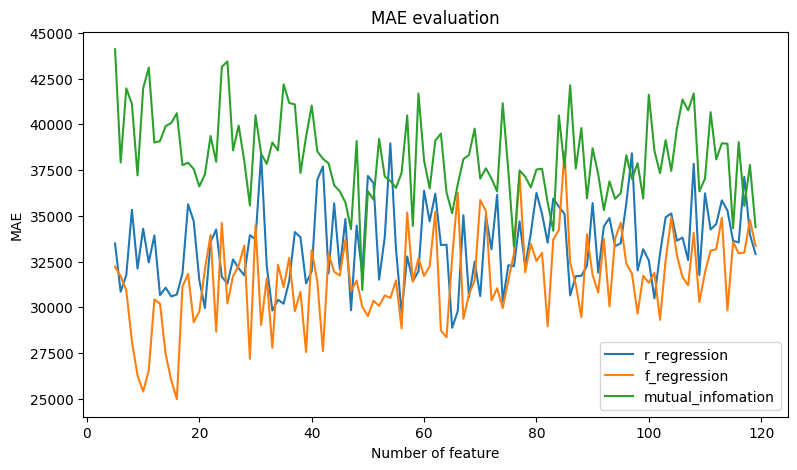

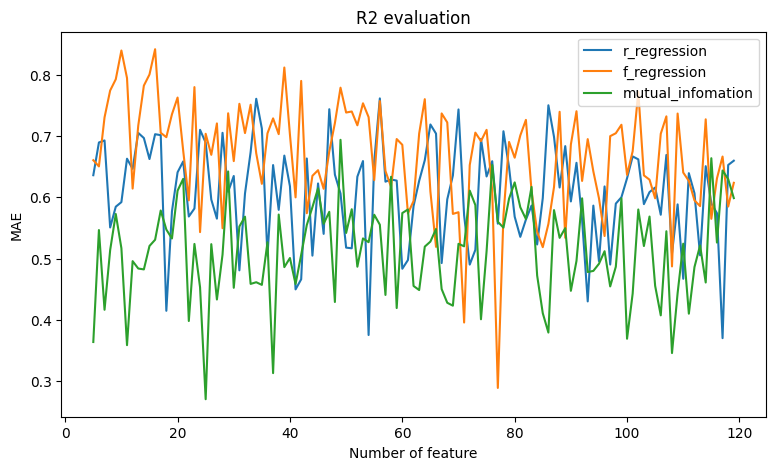

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()